In [1]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


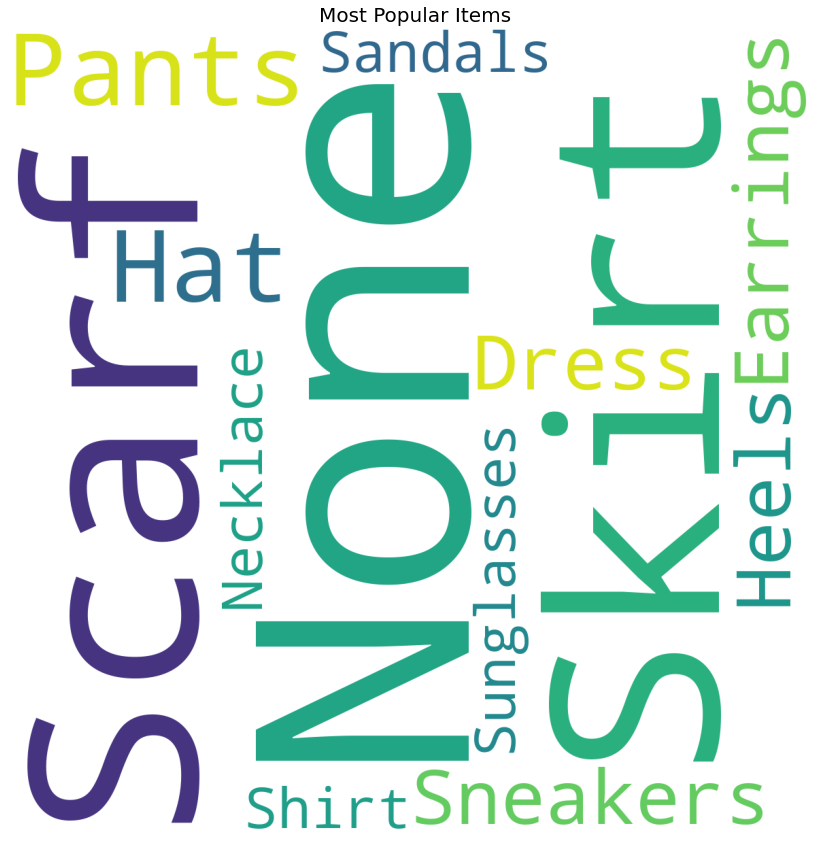

In [5]:
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(str(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

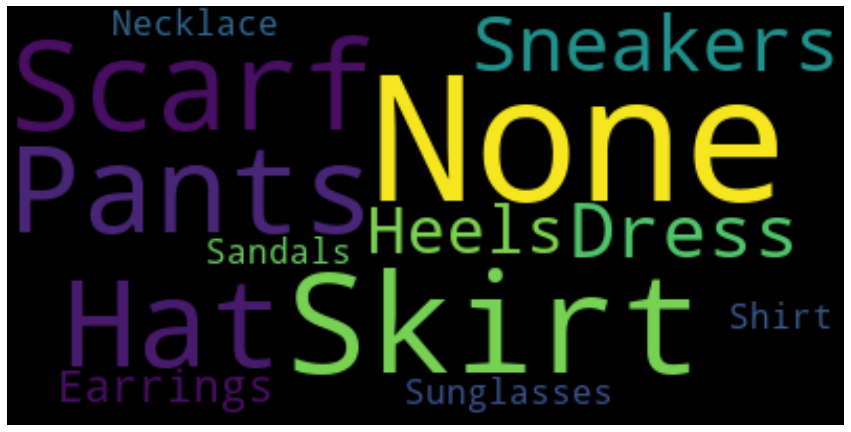

In [6]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(df))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
df.count(axis='columns')

0    5
1    5
2    5
3    7
4    6
dtype: int64

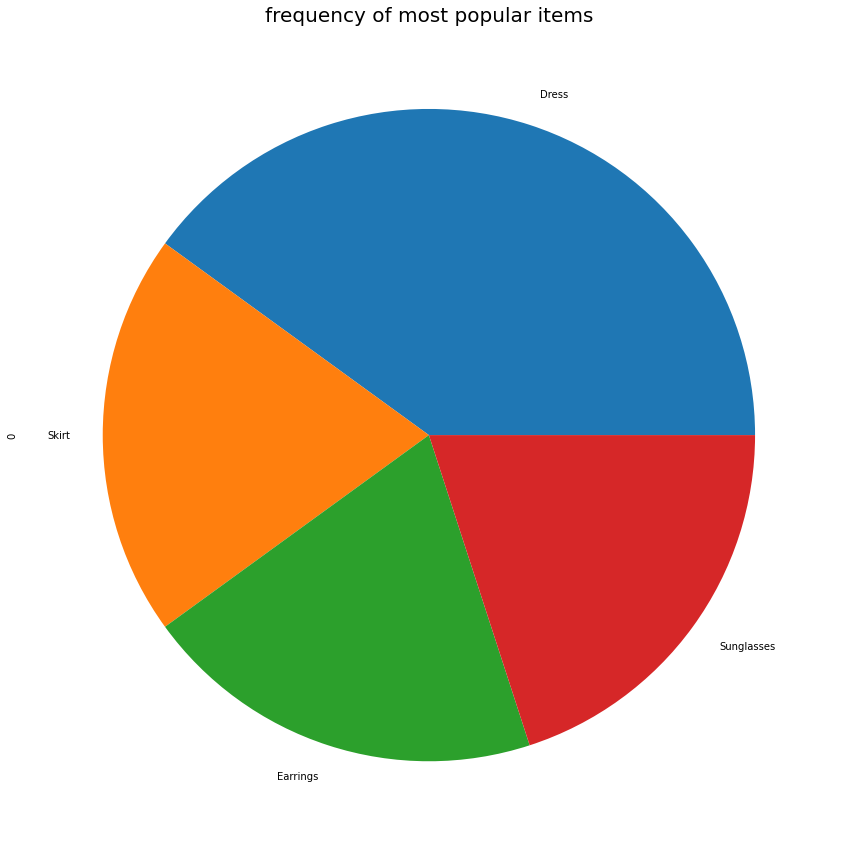

In [8]:
df[0].value_counts().head(20).plot.pie()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 0 )
plt.grid()
plt.show()

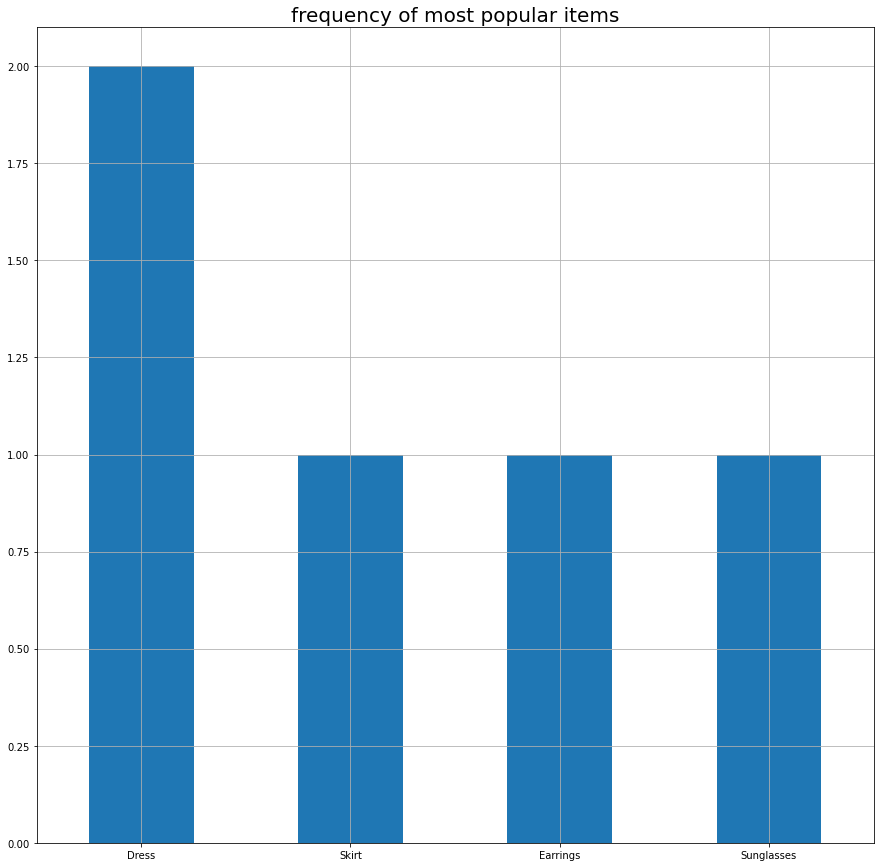

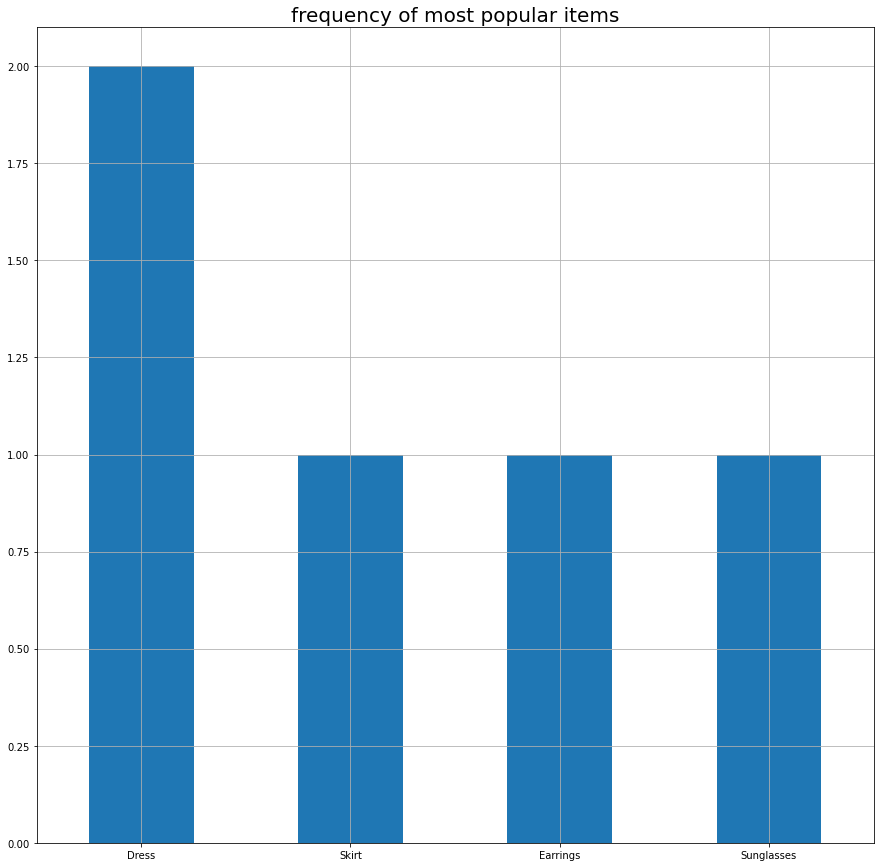

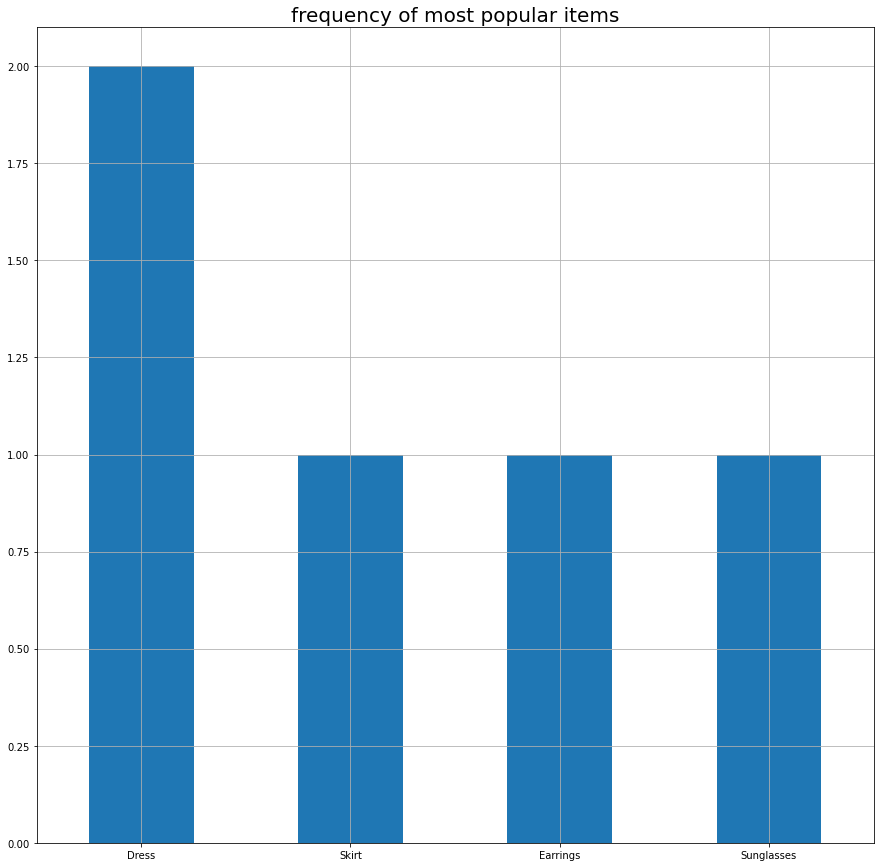

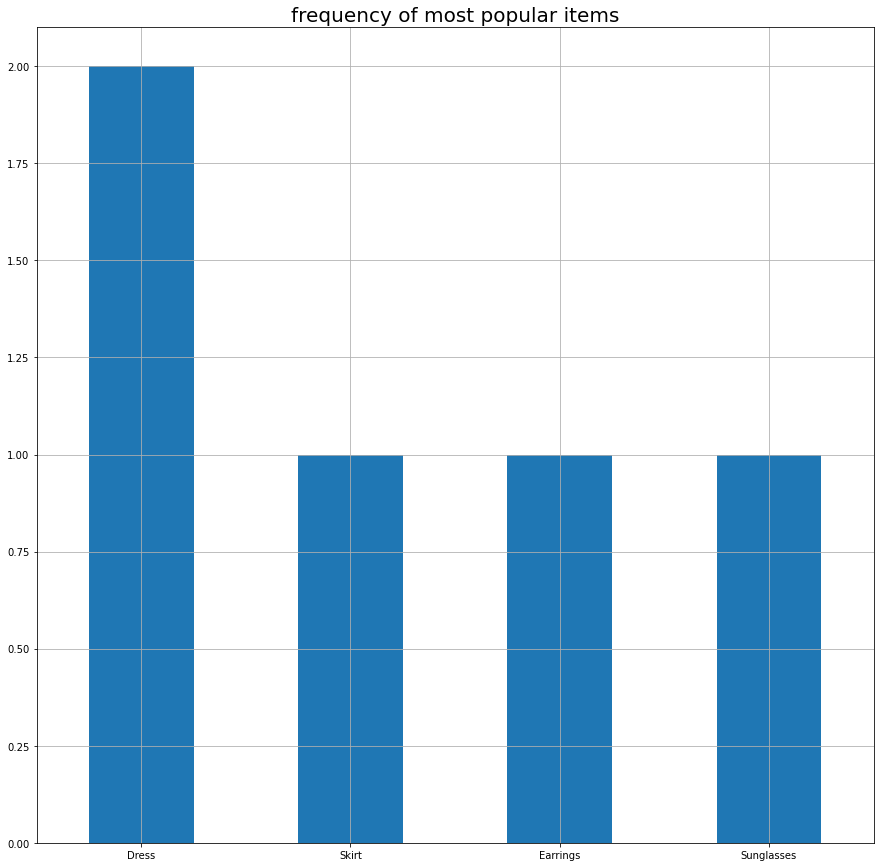

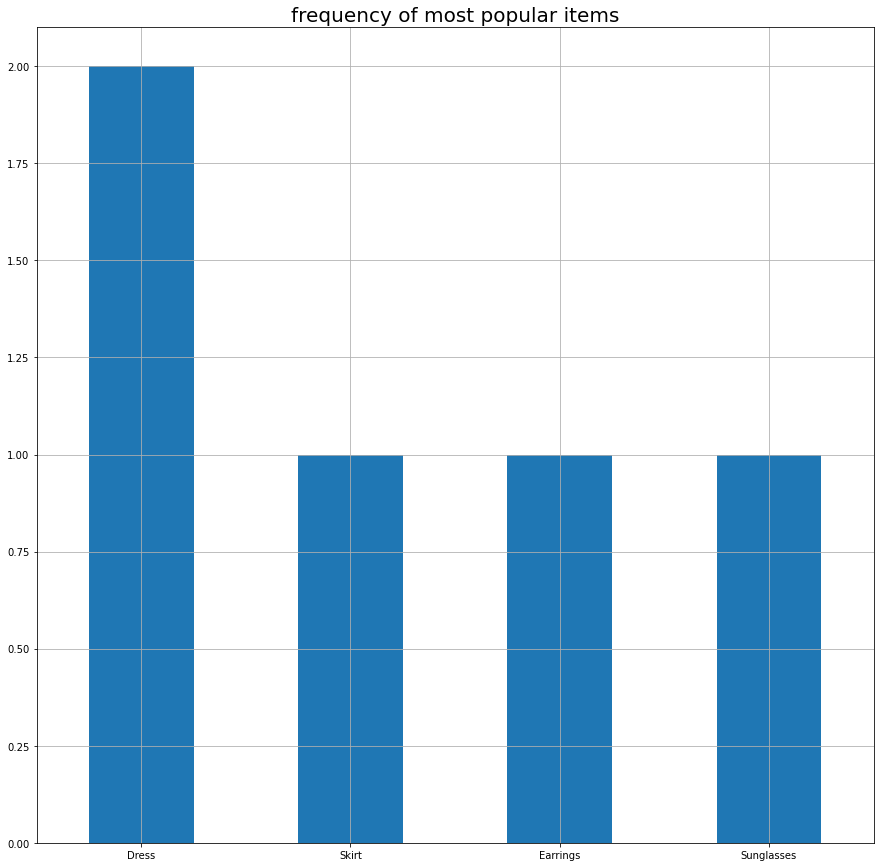

In [9]:
for index, row in df.iterrows():
    df[0].value_counts().head(20).plot.bar()
    plt.title('frequency of most popular items', fontsize = 20)
    plt.xticks(rotation = 0 )
    plt.grid()
    plt.show()
    

In [10]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [11]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [12]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [13]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [14]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [15]:
Market_df = pd.read_csv("C:/Users/Yousef Hanna/Desktop/github_gomycode/Market_Basket_Optimisation.csv", header=None)
Market_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


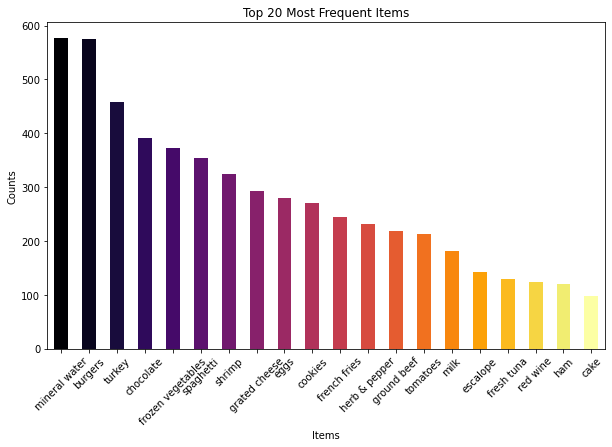

In [16]:
# Most Frequent Items Bar plot 

plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
Market_df[0].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.xticks(rotation = 45 )
plt.show()


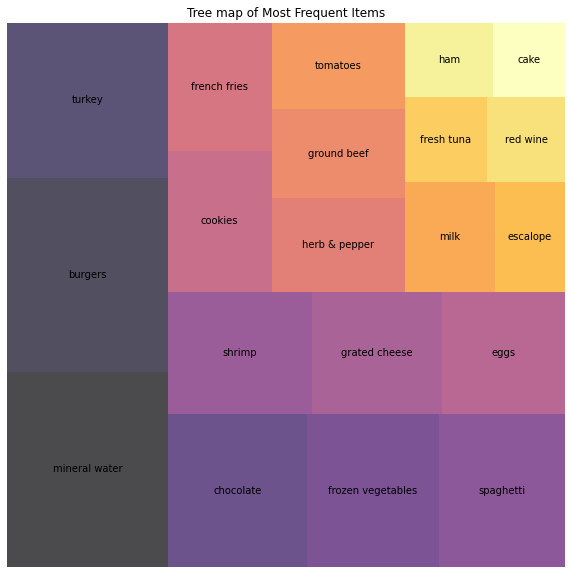

In [17]:
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = Market_df[0].value_counts().head(20).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.inferno(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

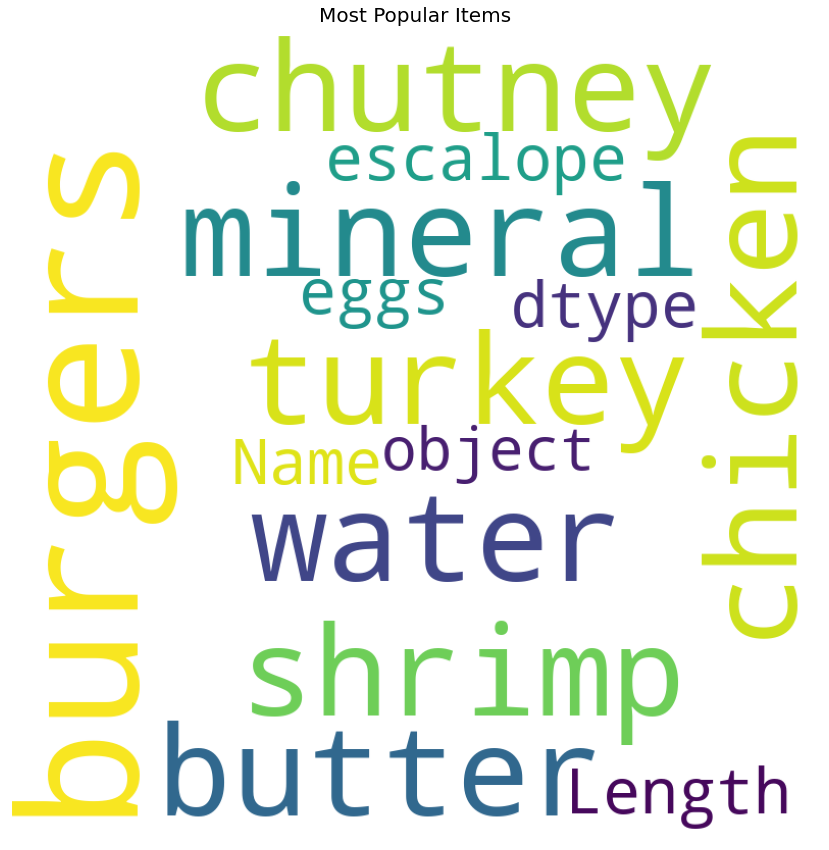

In [18]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 800,  height = 800, max_words = 121).generate(str(Market_df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [19]:
# Create an empty list to gather the values, and convert in np.array
items = []

# Loop through each value in rows and columns to get each value in the list, no matter even if they are repeated.
for i in range(0, Market_df.shape[0]):
    for j in range(0, Market_df.shape[1]):
        items.append(Market_df.values[i,j])

items = np.array(items)

In [20]:
print("Total Number of items present in the dataset",len(items))
df = pd.DataFrame(items, columns = ['items'])
df['items'].value_counts().head(10)

Total Number of items present in the dataset 150020


nan                  120657
mineral water          1788
eggs                   1348
spaghetti              1306
french fries           1282
chocolate              1230
green tea               991
milk                    972
ground beef             737
frozen vegetables       715
Name: items, dtype: int64

In [21]:
df['items'].unique()

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'nan',
       'chutney', 'turkey', 'milk', 'energy bar', 'whole wheat rice',
       'whole wheat pasta', 'french fries', 'soup', 'light cream',
       'shallot', 'frozen vegetables', 'spaghetti', 'pet food', 'cookies',
       'cooking oil', 'champagne', 'chocolate', 'chicken', 'oil',
       'fresh tuna', 'tomatoes', 'black tea', 'extra dark chocolate',
       'protein bar', 'red wine', 'pasta', 'pepper', 'shampoo', 'rice',
       'sparkling water', 'ham', 'body spray', 'pancakes',
       'grated cheese', 'white wine', 'toothpaste', 'parmesan cheese',
       'fresh bread', 'ground beef', 'escalope', 'herb & pepper',
       'tomato sauce', 'ma

In [37]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
# making each customers shopping items an identical list
# list of list is needed as an input for transaction encoder
transactions = []
for i in range(0,7501):
    transactions.append([str(Market_df.values[i,j]) for j in range(0,20)])
    
te=TransactionEncoder()
te_ary=te.fit_transform(transactions)    #Apply one-hot-encoding on our dataset
data=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
data


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
from mlxtend.frequent_patterns import apriori
apriori(data, min_support=0.15, use_colnames = False)

,support,itemsets
0,0.163845,(25)
1,0.179709,(37)
2,0.170911,(43)
3,0.238368,(72)
4,0.999867,(77)
5,0.174110,(101)
6,0.163845,"(25, 77)"
7,0.179709,"(77, 37)"
8,0.170911,"(43, 77)"
9,0.238235,"(72, 77)"


In [42]:
frequent_itemsets=apriori(data, min_support=0.15, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.238368,(mineral water)
4,0.999867,(nan)
5,0.174110,(spaghetti)
6,0.163845,"(nan, chocolate)"
7,0.179709,"(eggs, nan)"
8,0.170911,"(french fries, nan)"
9,0.238235,"(mineral water, nan)"


In [43]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
1,(eggs),(nan),0.179709,0.999867,0.179709,1.000000,1.000133,0.000024,inf
2,(french fries),(nan),0.170911,0.999867,0.170911,1.000000,1.000133,0.000023,inf
3,(mineral water),(nan),0.238368,0.999867,0.238235,0.999441,0.999574,-0.000102,0.238368
4,(spaghetti),(nan),0.174110,0.999867,0.174110,1.000000,1.000133,0.000023,inf


In [45]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.00)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(nan),(chocolate),0.999867,0.163845,0.163845,0.163867,1.000133,0.000022,1.000026
1,(chocolate),(nan),0.163845,0.999867,0.163845,1.000000,1.000133,0.000022,inf
2,(eggs),(nan),0.179709,0.999867,0.179709,1.000000,1.000133,0.000024,inf
3,(nan),(eggs),0.999867,0.179709,0.179709,0.179733,1.000133,0.000024,1.000029
4,(french fries),(nan),0.170911,0.999867,0.170911,1.000000,1.000133,0.000023,inf
5,(nan),(french fries),0.999867,0.170911,0.170911,0.170933,1.000133,0.000023,1.000027
6,(spaghetti),(nan),0.174110,0.999867,0.174110,1.000000,1.000133,0.000023,inf
7,(nan),(spaghetti),0.999867,0.174110,0.174110,0.174133,1.000133,0.000023,1.000028
